In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [90]:
data = pd.read_csv(r"NSE-TATAGLOBAL.csv")

In [91]:
print(data.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


In [92]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB
None


In [93]:
print(data.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [94]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


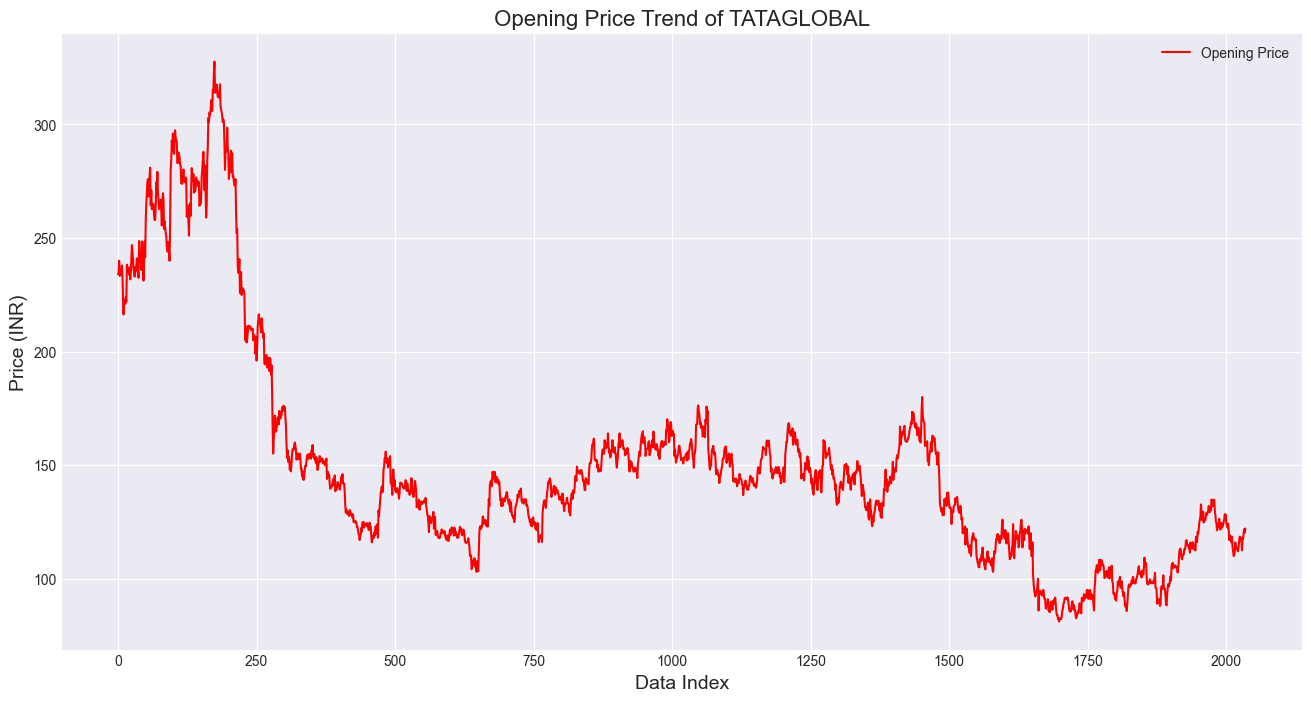

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

# Use dataframe index for x-axis
plt.plot(data.index, data['Open'], color='red', label='Opening Price')

plt.title('Opening Price Trend of TATAGLOBAL', fontsize=16)
plt.xlabel('Data Index', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

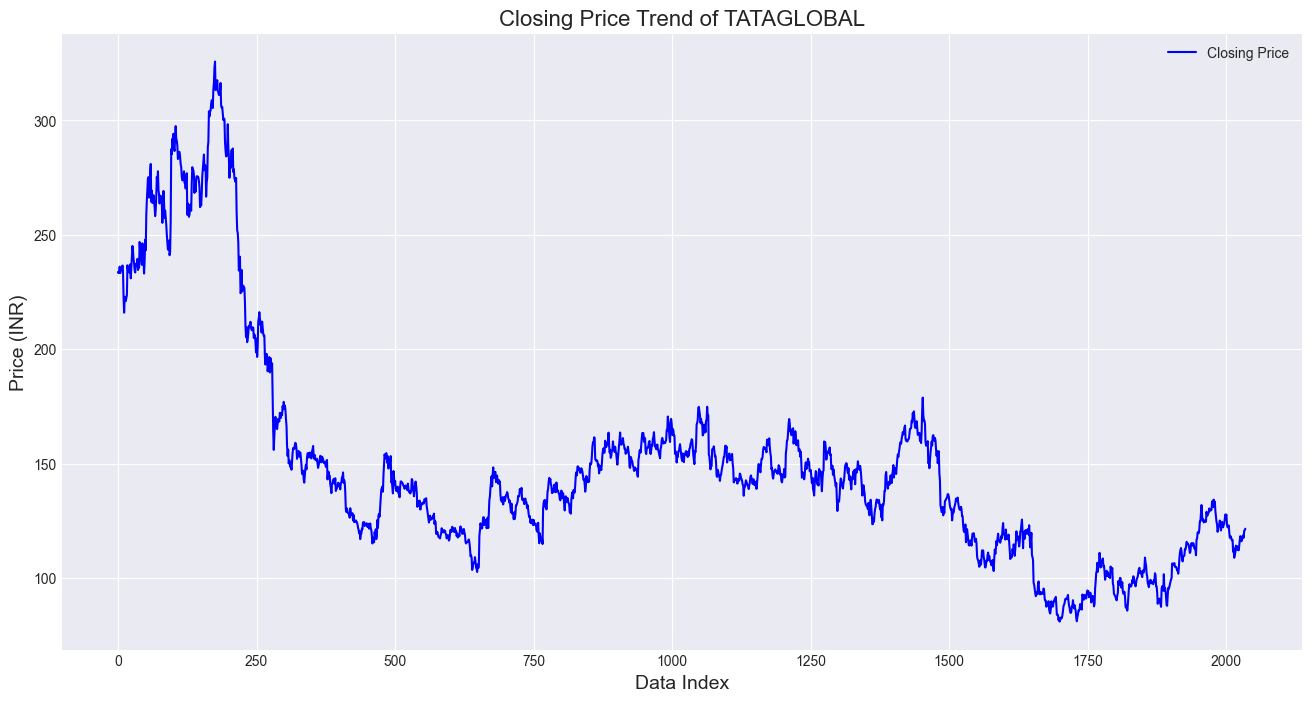

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.plot(data.index, data['Close'], color='blue', label='Closing Price')

plt.title('Closing Price Trend of TATAGLOBAL', fontsize=16)
plt.xlabel('Data Index', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


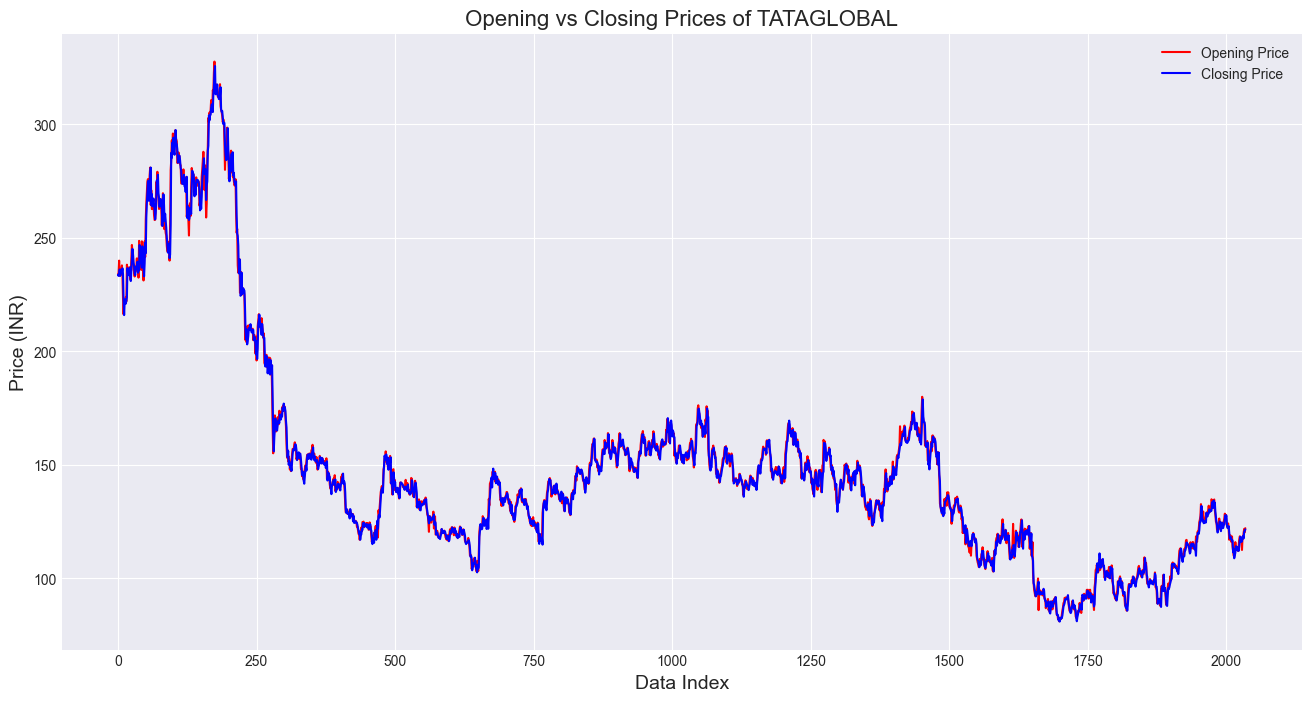

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

plt.plot(data.index, data['Open'], color='red', label='Opening Price')
plt.plot(data.index, data['Close'], color='blue', label='Closing Price')

plt.title('Opening vs Closing Prices of TATAGLOBAL', fontsize=16)
plt.xlabel('Data Index', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [98]:
data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']

In [99]:
data.dropna(inplace=True)

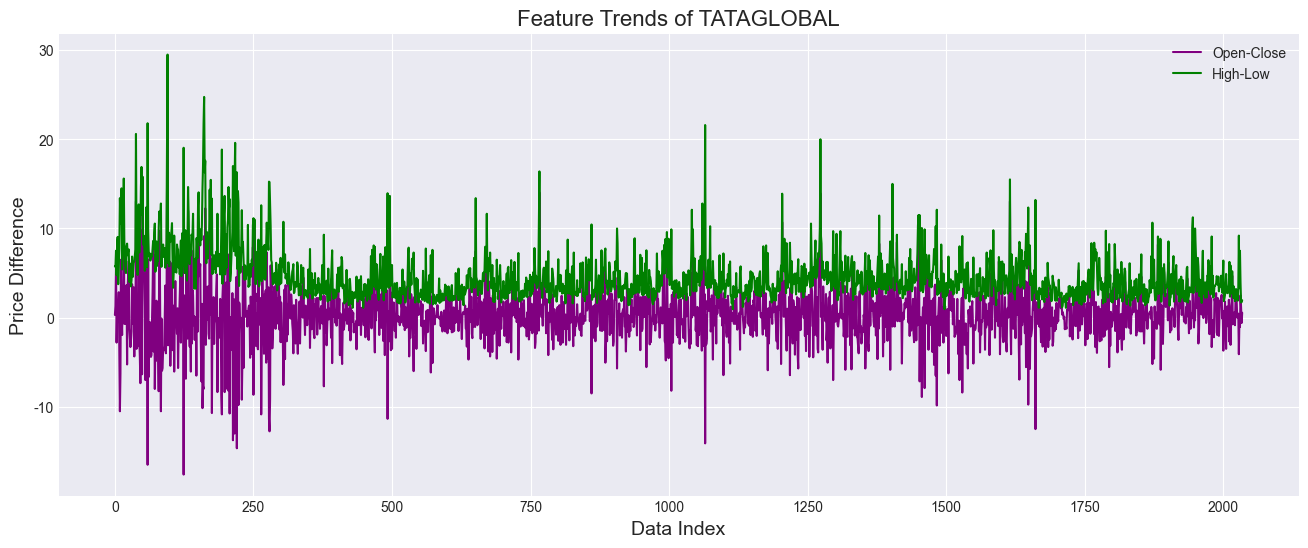

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))


plt.plot(data.index, data['Open-Close'], color='purple', label='Open-Close')
plt.plot(data.index, data['High-Low'], color='green', label='High-Low')

plt.title('Feature Trends of TATAGLOBAL', fontsize=16)
plt.xlabel('Data Index', fontsize=14)
plt.ylabel('Price Difference', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [101]:
print(data[['Open', 'Close', 'Open-Close', 'High', 'Low', 'High-Low']].head())

     Open   Close  Open-Close    High     Low  High-Low
0  234.05  233.75        0.30  235.95  230.20      5.75
1  234.55  233.25        1.30  236.80  231.10      5.70
2  240.00  234.25        5.75  240.00  232.50      7.50
3  233.30  236.10       -2.80  236.75  232.00      4.75
4  233.55  233.30        0.25  239.20  230.75      8.45


In [102]:
X = data[['Open-Close','High-Low']] 
y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

In [103]:
y

array([-1,  1,  1, ...,  1,  1, -1], shape=(2035,))

In [104]:

X = X[:-1]
y = y[:-1]

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


params = {
    'n_neighbors': list(range(2, 31)),
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan']
}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [108]:
print("Best Parameters:", model.best_params_)
print("Best CV Accuracy:", model.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}
Best CV Accuracy: 0.8759076707606119


In [109]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8764880952380952


In [110]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

# Print with proper labels
print('Train Accuracy: {:.2f}%'.format(accuracy_train * 100))
print('Test Accuracy: {:.2f}%'.format(accuracy_test * 100))

Train Accuracy: 87.37%
Test Accuracy: 87.65%


In [111]:
prediction_classification = model.predict(X_test)

In [112]:
actual_predicted_data = pd.DataFrame({'Actual Class':y_test, 'Predicted class':prediction_classification})

In [113]:
actual_predicted_data.head(10)

,Actual Class,Predicted class
0,1,1
1,1,-1
2,-1,-1
3,1,1
4,-1,-1
5,1,1
6,-1,-1
7,1,1
8,1,1
9,-1,1


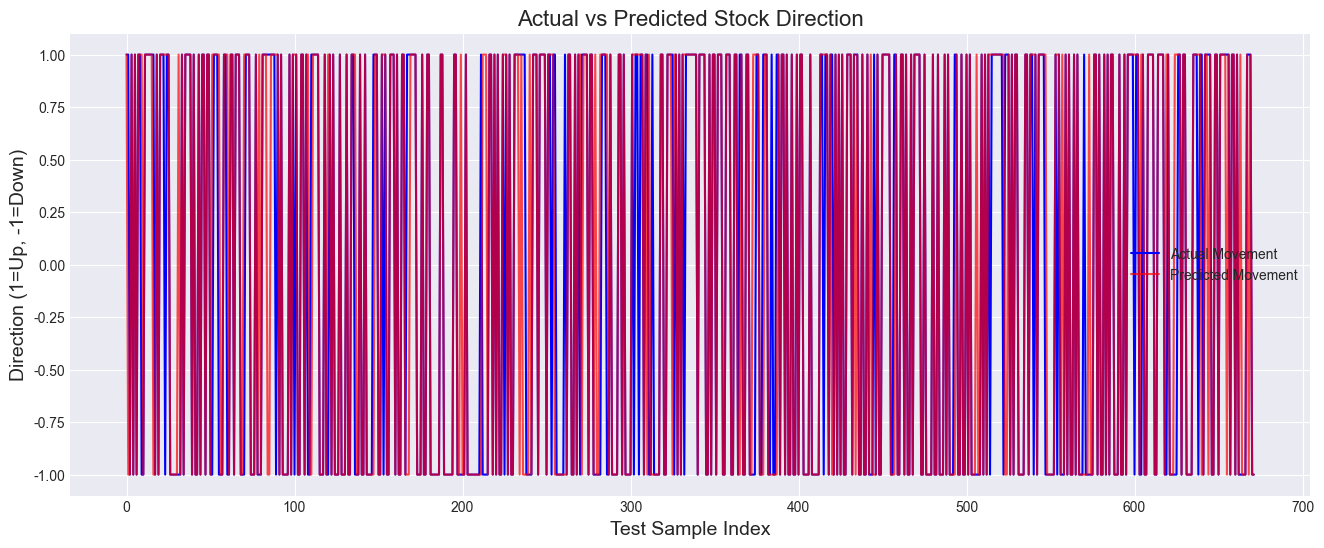

In [114]:
import numpy as np

plt.figure(figsize=(16,6))
plt.plot(y_test, label='Actual Movement', color='blue')
plt.plot(model.predict(X_test), label='Predicted Movement', color='red', alpha=0.7)

plt.title('Actual vs Predicted Stock Direction', fontsize=16)
plt.xlabel('Test Sample Index', fontsize=14)
plt.ylabel('Direction (1=Up, -1=Down)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


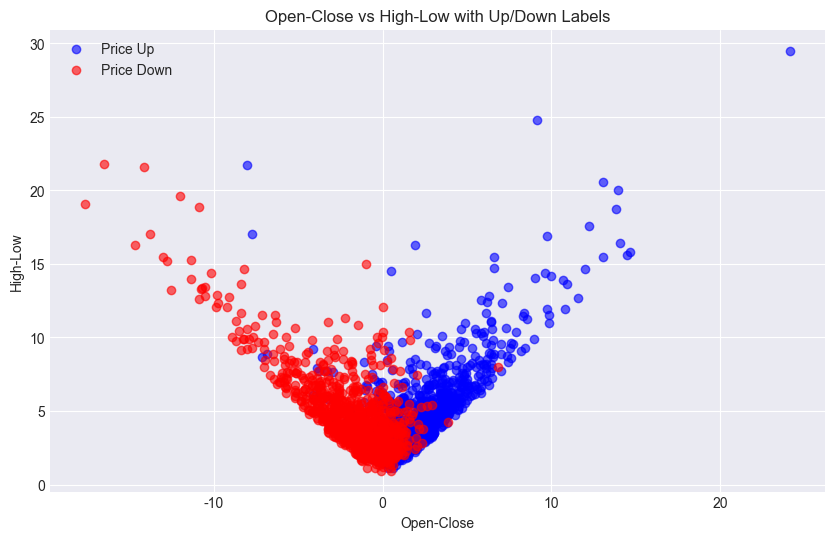

In [115]:
import matplotlib.pyplot as plt
import numpy as np


y_direction = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)

plt.figure(figsize=(10,6))


plt.scatter(
    data['Open-Close'][y_direction==1],
    data['High-Low'][y_direction==1],
    color='blue', label='Price Up', alpha=0.6
)


plt.scatter(
    data['Open-Close'][y_direction==-1],
    data['High-Low'][y_direction==-1],
    color='red', label='Price Down', alpha=0.6
)

plt.xlabel('Open-Close')
plt.ylabel('High-Low')
plt.title('Open-Close vs High-Low with Up/Down Labels')
plt.legend()  
plt.grid(True)
plt.show()

Average daily volatility: 1.50%


Enter today's Opening Price:  4
Enter today's Closing Price:  5
Enter today's High Price:  7
Enter today's Low Price:  3



Predicted movement for next 5 days:

 Day Prediction  Predicted Close (INR)  Confidence (%)
   1     DOWN 📉                   4.90            96.0
   2     DOWN 📉                   4.86            68.0
   3     DOWN 📉                   4.77            68.0
   4     DOWN 📉                   4.72            68.0
   5     DOWN 📉                   4.63            68.0


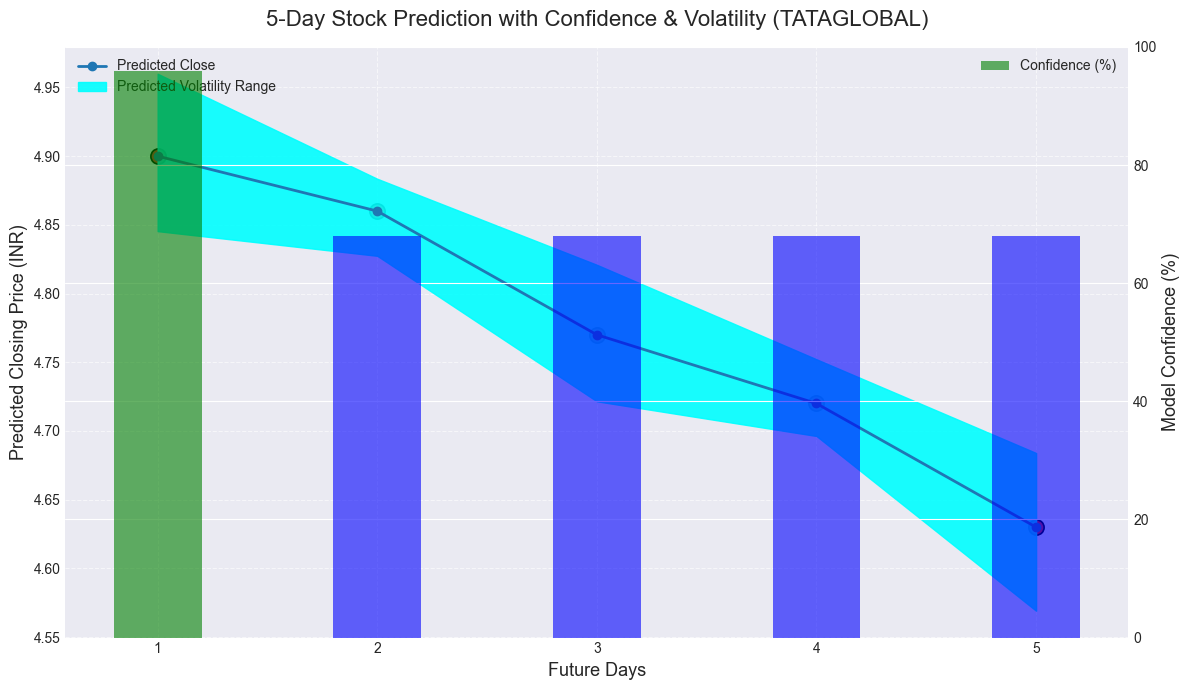

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data['Daily Change %'] = data['Close'].pct_change() * 100
avg_volatility = data['Daily Change %'].abs().mean() / 100   # Convert to decimal
print(f"Average daily volatility: {avg_volatility*100:.2f}%")

# --- Step 2: Feature names used during training ---
feature_columns = ['Open-Close', 'High-Low']


def predict_stock(open_price, close_price, high_price, low_price):
    open_close = open_price - close_price
    high_low = high_price - low_price
    
    X_new = pd.DataFrame([[open_close, high_low]], columns=feature_columns)
    X_new_scaled = scaler.transform(X_new)
    
   
    pred = model.predict(X_new_scaled)
    
    
    if hasattr(model, "predict_proba"):
        prob = model.predict_proba(X_new_scaled)[0]
        confidence = max(prob) * 100
    else:
        confidence = 50.0  # fallback if model has no predict_proba

    return (1 if pred[0] == 1 else -1), confidence

def predict_next_five_days(open_price, close_price, high_price, low_price):
    results = []
    current_open, current_close, current_high, current_low = open_price, close_price, high_price, low_price

    for day in range(1, 6):
        direction, confidence = predict_stock(current_open, current_close, current_high, current_low)
        
       
        change = np.random.uniform(0.5 * avg_volatility, 1.5 * avg_volatility)

        if direction == 1: 
            current_open = current_close
            current_close *= (1 + change)
            current_high = current_close * (1 + 0.6 * change)
            current_low = current_close * (1 - 0.6 * change)
            results.append((day, "UP 📈", round(current_close, 2), round(confidence,2), current_low, current_high))
        else: 
            current_open = current_close
            current_close *= (1 - change)
            current_high = current_close * (1 + 0.6 * change)
            current_low = current_close * (1 - 0.6 * change)
            results.append((day, "DOWN 📉", round(current_close, 2), round(confidence,2), current_low, current_high))
    
    df_results = pd.DataFrame(results, columns=["Day", "Prediction", "Predicted Close (INR)", "Confidence (%)", "Low", "High"])
    return df_results


try:
    open_price = float(input("Enter today's Opening Price: "))
    close_price = float(input("Enter today's Closing Price: "))
    high_price = float(input("Enter today's High Price: "))
    low_price = float(input("Enter today's Low Price: "))

    
    df_pred = predict_next_five_days(open_price, close_price, high_price, low_price)
    print("\nPredicted movement for next 5 days:\n")
    print(df_pred[["Day", "Prediction", "Predicted Close (INR)", "Confidence (%)"]].to_string(index=False))

   
    fig, ax1 = plt.subplots(figsize=(12,7))

   
    ax1.plot(df_pred['Day'], df_pred['Predicted Close (INR)'], marker='o', linewidth=2, color='#1f77b4', label='Predicted Close')

   
    for i in range(len(df_pred)):
        color = '#2ca02c' if "UP" in df_pred['Prediction'][i] else '#d62728'
        ax1.scatter(df_pred['Day'][i], df_pred['Predicted Close (INR)'][i], color=color, s=120, edgecolors='black', linewidth=1.2)

   
    ax1.fill_between(df_pred['Day'], df_pred['Low'], df_pred['High'], color='cyan', alpha=0.9, label='Predicted Volatility Range')

    ax1.set_xlabel("Future Days", fontsize=13)
    ax1.set_ylabel("Predicted Closing Price (INR)", fontsize=13)
    ax1.set_title("5-Day Stock Prediction with Confidence & Volatility (TATAGLOBAL)", fontsize=16, pad=15)
    ax1.legend(loc="upper left")
    ax1.grid(True, linestyle='--', alpha=0.6)

    ax2 = ax1.twinx()
    colors = ['green' if c >= 75 else 'blue' if c >= 50 else 'red' for c in df_pred['Confidence (%)']]
    ax2.bar(df_pred['Day'], df_pred['Confidence (%)'], color=colors, alpha=0.6, width=0.4, label='Confidence (%)')
    ax2.set_ylabel("Model Confidence (%)", fontsize=13)
    ax2.set_ylim(0, 100)
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

except ValueError:
    print("Please enter valid numeric values for prices.")


In [117]:
# 240.00  234.25          240.00  232.50 

In [118]:
import joblib

# Save model
joblib.dump(model, "knn_model.pkl")



['knn_model.pkl']

In [119]:
# Save scaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']